# 🚢 Titanic Dataset – Exploratory Data Analysis & Modeling

---

## 🧑‍💻 Designed By
**Muhammad Anas**

---

## 📌 Dataset Overview

The Titanic dataset contains information about passengers who traveled on the RMS Titanic.  
It is widely used for **classification problems**, where the goal is to predict whether a passenger survived or not based on different features.

This dataset is well-suited for:
- Exploratory Data Analysis (EDA)
- Feature engineering
- Classification models (Decision Tree, Logistic Regression, etc.)

---

## 🎯 Objective

The main objective of this project is to:
- Perform exploratory data analysis on the Titanic dataset
- Clean and preprocess the data
- Train a **Decision Tree model** to predict passenger survival

---

## 🗂️ Dataset Information

- **Total Rows:** 891  
- **Total Columns:** 12  
- **Target Variable:** `Survived`

---

## 📄 Column Descriptions

| Column Name | Description |
|------------|-------------|
| **PassengerId** | Unique identifier for each passenger |
| **Survived** | Survival status (0 = Not Survived, 1 = Survived) |
| **Pclass** | Passenger class (1 = First, 2 = Second, 3 = Third) |
| **Name** | Passenger name |
| **Sex** | Gender of the passenger |
| **Age** | Age of the passenger |
| **SibSp** | Number of siblings or spouses aboard |
| **Parch** | Number of parents or children aboard |
| **Ticket** | Ticket number |
| **Fare** | Passenger fare |
| **Cabin** | Cabin number |
| **Embarked** | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

---

## 🔍 Key Observations (Initial)

- The dataset contains **missing values** in `Age`, `Cabin`, and `Embarked`
- Both **numerical and categorical features** are present
- Data cleaning and encoding are required before model training

---

## 🚀 Next Steps

1. Handle missing values
2. Encode categorical variables
3. Perform univariate and bivariate analysis
4. Train a Decision Tree classifier
5. Evaluate model performance

---

✨ *This notebook is created for learning and practicing machine learning concepts using the Titanic dataset.*


In [52]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Load dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
#checking the shape of the dataset
shape=df.shape
print(f"The dataset contains {shape[0]} rows and {shape[1]} columns.")

The dataset contains 891 rows and 15 columns.


In [55]:
#checking for missing values
missing_values=df.isnull().sum()
missing_values.sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [56]:
#checking the percentages of missing values
missing_percentages=(df.isnull().sum()/len(df))*100
missing_percentages.sort_values(ascending=False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [57]:
#removing the deck column due to high missing values
df=df.drop('deck',axis=1)

In [58]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [59]:
#imputing the age column with median value
df['age'].fillna(df['age'].median(),inplace=True)

In [60]:
#imputing the missing values of the embarked and embarked town  column with mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [61]:
df["embark_town"].fillna(df['embark_town'].mode()[0],inplace=True)

In [62]:
#checking for missing values after imputation
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [63]:
#checking for the duplicate values
duplicate_values=df.duplicated().sum()
print(f"The dataset contains {duplicate_values} duplicate values.")

The dataset contains 116 duplicate values.


In [64]:
#removing the duplicate values
df=df.drop_duplicates()

In [65]:
#checking for the duplicated values after removing them
duplicate_values_after_removal=df.duplicated().sum()
print(f"After removing, the dataset contains {duplicate_values_after_removal} duplicate values.")

After removing, the dataset contains 0 duplicate values.


In [66]:
categorial_columns=df.select_dtypes(include=['object','category']).columns.tolist()
categorial_columns

['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']

In [67]:
#ecoding categorical variables
label_encoder=LabelEncoder()
for col in categorial_columns:
    df[col]=label_encoder.fit_transform(df[col])

In [68]:
#final look at the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [69]:
#spliting the dataset into features and target variable
X=df.drop('survived',axis=1)
y=df['survived']

In [70]:
#spltting the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
#training the Decision Tree Classifier
dt_classifier=DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [72]:
#predicting the target variable for the test set
y_pred=dt_classifier.predict(X_test)

In [73]:
#checking the accuracy of the model
accuracy=dt_classifier.score(X_test,y_test)
print(f"The accuracy of the Decision Tree Classifier is: {accuracy*100:.2f}%")

The accuracy of the Decision Tree Classifier is: 100.00%


In [74]:
#checking the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Confusion Matrix:
[[95  0]
 [ 0 60]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        60

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



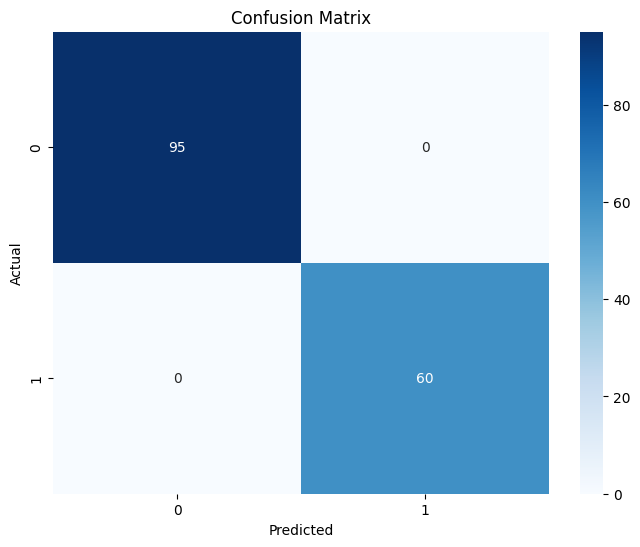

In [75]:
#using the seaborn to plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

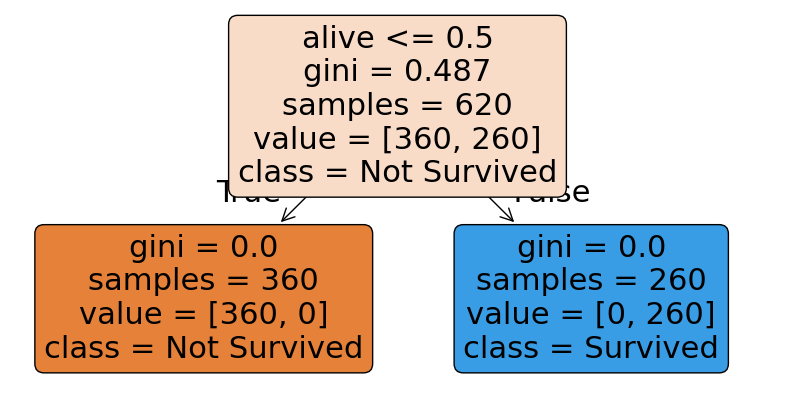

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.show()

